# Phase 4 project

## Summary
The notebook should include a summary at the beginning that briefly and accurately describes your process. The summary should be approximately 250 words -- about the size of a research paper abstract.

# Notes:

|  ||
|:-----|:----:|
|lines total     |9093     |
|have "directed_at" product  |3291     |


|Sentiment  |Count|
|:-----|:----:|
|No emotion toward brand or product     |5389     |
|Positive emotion     |2978     |
|Negative emotion     |570     |
|I can't tell     |156     |


iPad                               946<br>
Apple                              661<br>
iPad or iPhone App                 470<br>
Google                             430<br>
iPhone                             297<br>
Other Google product or service    293<br>
Android App                         81<br>
Android                             78<br>
Other Apple product or service      35




---
## Part 1: KNN + Pipelines [Suggested time: 20 minutes]
---

In [66]:
# Run this cell without changes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score

from sklearn.model_selection import train_test_split, GridSearchCV
from keras import models
from keras import layers
from keras import optimizers

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mleroi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mleroi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [68]:
processed_df=df.dropna(subset=['tweet_text'])

In [69]:
processed_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [70]:
display(df.loc[9089,'tweet_text'])

'Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles'

In [71]:
processed_df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [72]:
processed_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [73]:
pos_neg_df = processed_df[(processed_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | (processed_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]
pos_neg_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [86]:
# Raw text complaints
pos_neg_tweets = pos_neg_df['tweet_text'] 

# Initialize a tokenizer 
tokenizer = Tokenizer(num_words=2000) 

# Fit it to the complaints
tokenizer.fit_on_texts(pos_neg_tweets) 


# Similar to sequences, but returns a numpy array
one_hot_results= tokenizer.texts_to_matrix(pos_neg_tweets, mode='binary') 
print('one_hot_results type:', type(one_hot_results))

# Useful if we wish to decode (more explanation below)
word_index = tokenizer.word_index 

# Tokens are the number of unique words across the corpus
print('Found %s unique tokens.' % len(word_index)) 

# Our coded data
print('Dimensions of our coded results:', np.shape(one_hot_results)) 

one_hot_results type: <class 'numpy.ndarray'>
Found 6230 unique tokens.
Dimensions of our coded results: (3548, 2000)


In [87]:
# pos_neg_sentiment = [1 for sent in pos_neg_df['is_there_an_emotion_directed_at_a_brand_or_product']]
# len(pos_neg_sentiment)

pos_neg_sentiment = pos_neg_df['is_there_an_emotion_directed_at_a_brand_or_product']

# Initialize
le = LabelEncoder() 
le.fit(pos_neg_sentiment)
print('Original class labels:')
print(list(le.classes_))
print('\n')
pos_neg_sentiment_cat = le.transform(pos_neg_sentiment)  

# If you wish to retrieve the original descriptive labels post production
# list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) 

print('New product labels:')
print(pos_neg_sentiment_cat)
print('\n')

# Each row will be all zeros except for the category for that observation 
print('One hot labels; 2 binary columns, one for each of the categories.') 
pos_neg_sentiment_onehot = to_categorical(pos_neg_sentiment_cat)
print(pos_neg_sentiment_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(pos_neg_sentiment_onehot))

Original class labels:
['Negative emotion', 'Positive emotion']


New product labels:
[0 1 1 ... 0 1 1]


One hot labels; 2 binary columns, one for each of the categories.
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


One hot labels shape:
(3548, 2)


In [88]:
X_train_full, X_test, y_train_full, y_test = train_test_split(one_hot_results,pos_neg_sentiment_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(one_hot_results,pos_neg_sentiment_onehot, test_size=0.2, random_state=42)

In [89]:
# Initialize a sequential model
model = models.Sequential()

# Two layers with relu activation
model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(25, activation='relu'))

# One layer with softmax activation 
model.add(layers.Dense(2, activation='softmax'))

In [90]:
model.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
history = model.fit(X_train,
                    y_train,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/120
12/12 [==============================] - 0s 16ms/step - loss: 0.6838 - accuracy: 0.5884 - val_loss: 0.6312 - val_accuracy: 0.8000
Epoch 2/120
12/12 [==============================] - 0s 7ms/step - loss: 0.6041 - accuracy: 0.8319 - val_loss: 0.5665 - val_accuracy: 0.8380
Epoch 3/120
12/12 [==============================] - 0s 7ms/step - loss: 0.5467 - accuracy: 0.8397 - val_loss: 0.5176 - val_accuracy: 0.8380
Epoch 4/120
12/12 [==============================] - 0s 7ms/step - loss: 0.5038 - accuracy: 0.8397 - val_loss: 0.4848 - val_accuracy: 0.8380
Epoch 5/120
12/12 [==============================] - 0s 6ms/step - loss: 0.4755 - accuracy: 0.8397 - val_loss: 0.4638 - val_accuracy: 0.8380
Epoch 6/120
12/12 [==============================] - 0s 7ms/step - loss: 0.4575 - accuracy: 0.8397 - val_loss: 0.4486 - val_accuracy: 0.8380
Epoch 7/120
12/12 [==============================] - 0s 7ms/step - loss: 0.4443 - accuracy: 0.8397 - val_loss: 0.4396 - val_accuracy: 0.8380
Epoch 8/120


Epoch 59/120
12/12 [==============================] - 0s 7ms/step - loss: 0.3783 - accuracy: 0.8400 - val_loss: 0.3906 - val_accuracy: 0.8380
Epoch 60/120
12/12 [==============================] - 0s 6ms/step - loss: 0.3772 - accuracy: 0.8400 - val_loss: 0.3901 - val_accuracy: 0.8380
Epoch 61/120
12/12 [==============================] - 0s 6ms/step - loss: 0.3762 - accuracy: 0.8400 - val_loss: 0.3894 - val_accuracy: 0.8380
Epoch 62/120
12/12 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 0.8400 - val_loss: 0.3887 - val_accuracy: 0.8380
Epoch 63/120
12/12 [==============================] - 0s 7ms/step - loss: 0.3744 - accuracy: 0.8400 - val_loss: 0.3880 - val_accuracy: 0.8380
Epoch 64/120
12/12 [==============================] - 0s 7ms/step - loss: 0.3734 - accuracy: 0.8400 - val_loss: 0.3872 - val_accuracy: 0.8380
Epoch 65/120
12/12 [==============================] - 0s 6ms/step - loss: 0.3723 - accuracy: 0.8400 - val_loss: 0.3865 - val_accuracy: 0.8380
Epoch 

12/12 [==============================] - 0s 7ms/step - loss: 0.3205 - accuracy: 0.8580 - val_loss: 0.3584 - val_accuracy: 0.8451
Epoch 117/120
12/12 [==============================] - 0s 6ms/step - loss: 0.3195 - accuracy: 0.8594 - val_loss: 0.3573 - val_accuracy: 0.8465
Epoch 118/120
12/12 [==============================] - 0s 8ms/step - loss: 0.3183 - accuracy: 0.8615 - val_loss: 0.3569 - val_accuracy: 0.8465
Epoch 119/120
12/12 [==============================] - 0s 6ms/step - loss: 0.3173 - accuracy: 0.8636 - val_loss: 0.3561 - val_accuracy: 0.8451
Epoch 120/120
12/12 [==============================] - 0s 6ms/step - loss: 0.3162 - accuracy: 0.8647 - val_loss: 0.3556 - val_accuracy: 0.8437


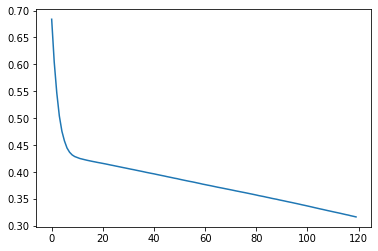

In [92]:
# Plot the loss vs the number of epoch
plt.plot(history.history['loss']);

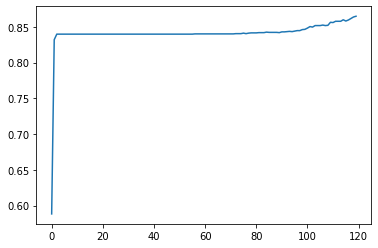

In [93]:
# Plot the training accuracy vs the number of epochs
plt.plot(history.history['accuracy']);

In [94]:
# Output (probability) predictions for the test set 
y_hat_test = model.predict(X_val)

23/23 [==============================] - 0s 2ms/step


In [95]:
# Print the loss and accuracy for the training set 
results_train = model.evaluate(X_train, y_train)
results_train

89/89 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.8665


[0.31521666049957275, 0.8664552569389343]

In [96]:
# Print the loss and accuracy for the test set 
results_test = model.evaluate(X_val, y_val)
results_test

23/23 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8437


[0.3555852472782135, 0.8436619639396667]

In [85]:
# REGEX code for 3+ characters:    r"(?u)\w{3,}"